# Veer Financial Modelling Project 

Please keep this confidential and do not circulate widely.

Veer Technologies 2024

## Introduction

This is a very open-ended task that does not have clear-cut right or wrong answers. Please run with it in a way that excites you!

We want to see how you approach working in the financial domain: what hypotheses you raise and what new ideas you bring to the task. We also want to see how you use Python for data science and signal searching. It does not matter if you don't find any signals (yet), as long as you show us what you tried, test interesting ideas and make some new plots (data visuals).

We would not expect you to work for more than 3 hours total on the tasks below. The objective is to get to know how you think–not to give you unnecessary work! You don't need to write anything down for Task 1, just prepare some thoughts to talk to us about.  For Task 2, implement a simple agent in 1 method in a few lines of Python.

## Context

Consider the following two mutual funds. MFS Blended Research Core Equity Fund, “musex” for short. From its [home page](https://www.mfs.com/en-us/individual-investor/product-strategies/mutual-funds/MUSEX-blended-research-core-equity-fund.html#tab-overview), we are able to download monthly holdings of the portfolio. And [Fidelity Magellan Fund](https://fundresearch.fidelity.com/mutual-funds/view-all/316184100), “magellan” for short. We retrieve its quarterly holdings using the FMP platform.
 
We focus on the percentage weights of the fund holdings' portfolio. Here the weight of different stocks is calculated based on total USD value.

Both funds claim to be benchmarked against the S&P500 index. We are interested in exploring any changes in the fund holdings that could be driven specifically by changes in the S&P composition. Alternatively, it could be that there are simple patterns in the behaviour of the stock prices that can begin to explain changes in the fund holdings.

We use the quarterly weightings in the SPDR S&P 500 ETF Trust to approximate the benchmark S&P500 index weightings. Again, these are obtained from the FMP platform.

## This Notebook

The repository you were provided contains pickled data and this Jupyter notebook that has methods (below) for reading them in and making initial plots.

## Take Home 1: Prepare Free Response

What would you improve in the notebook, as provided to you? Do you notice any shortcomings?

Do you notice any patterns emerging in the datasets? What could be possible hypotheses to test? Please go ahead and implement some research.

What additional data streams could be worth having, beyond what you've been provided with, when trying to explain changes in mutual fund holdings?

Some people talk of “fundamental” and “quantitative” as two distinct investment strategies for a mutual fund to pursue. How could you begin to 3diagnose which strategy a fund is pursuing, based on its actual trading?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from matplotlib.dates import date2num
from datetime import datetime

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
months = mdates.MonthLocator()
years = mdates.YearLocator()

plt.style.use('ggplot')

## Load data and make plots

In [3]:
df_musex = pd.read_pickle("df_musex" + ".pkl")

In [4]:
df_musex.head()

,ticker,company,value,percent,sector,date,count
0,MSFT,Microsoft Corp,71040867.90,7.05,Information Technology,2023-03-31,118
1,AAPL,Apple Inc,68594277.50,6.81,Information Technology,2023-03-31,118
3,AMZN,Amazon.com Inc,24448226.55,2.43,Consumer Discretionary,2023-03-31,118
6,JPM,JPMorgan Chase & Co,22914752.88,2.27,Financials,2023-03-31,118
7,JNJ,Johnson & Johnson,20233390.00,2.01,Health Care,2023-03-31,118


In [5]:
df_musex.date.values[0]

np.datetime64('2023-03-31T00:00:00.000000')

In [6]:
df_musex.company.value_counts()

company
Microsoft Corp         35
Apple Inc              35
Amazon.com Inc         35
JPMorgan Chase & Co    35
Johnson & Johnson      35
Accenture PLC          35
Name: count, dtype: int64

In [7]:
lst = ['MSFT', 'AAPL', 'AMZN', 'JPM', 'JNJ', 'ACN']

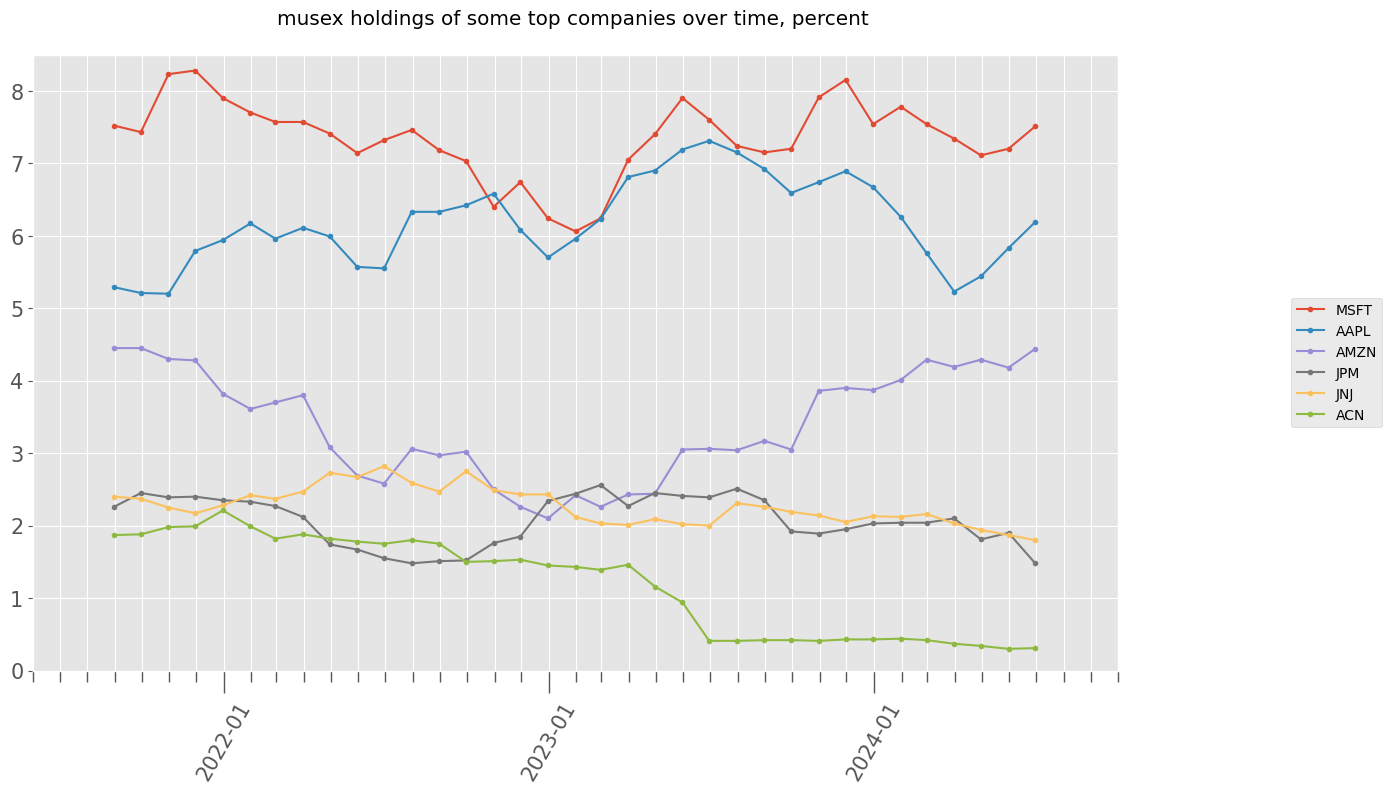

In [8]:
rcParams['figure.figsize'] = 14, 8

ax = plt.axes()

for k in lst:
    c = df_musex.loc[df_musex["ticker"].isin([k])].sort_values(by = "date")
    plt.plot(date2num(c.date),c.percent, marker='.', label = k)    # width=20

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
plt.grid(which = "minor")

plt.xticks(rotation=60)
plt.tick_params(labelsize=15)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

ax.set_ylim([0, 8.5])

ax.tick_params(axis='x', which='both', width=1)
ax.tick_params(axis='x', which='minor', length=8)
ax.tick_params(axis='x', which='major', length=16)
ax.set_xlim([datetime(2021, 6, 1), datetime(2024, 10, 1)])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.title("musex holdings of some top companies over time, percent \n")
plt.show()


In [9]:
df_SP = pd.read_pickle("df_SP" + ".pkl")

In [10]:
df_SP.company.value_counts()

company
Apple Inc              11
Amazon.com Inc         11
Accenture PLC          11
Johnson & Johnson      11
Microsoft Corp         11
JPMorgan Chase & Co    11
Name: count, dtype: int64

In [11]:
df_SP.head()

,ticker,company,percent,date,count
57,AAPL,Apple Inc,6.046568,2022-12-31,504
67,AMZN,Amazon.com Inc,2.320183,2022-12-31,504
98,ACN,Accenture PLC,0.522573,2022-12-31,504
237,JNJ,Johnson & Johnson,1.438898,2022-12-31,504
280,MSFT,Microsoft Corp,5.563589,2022-12-31,504


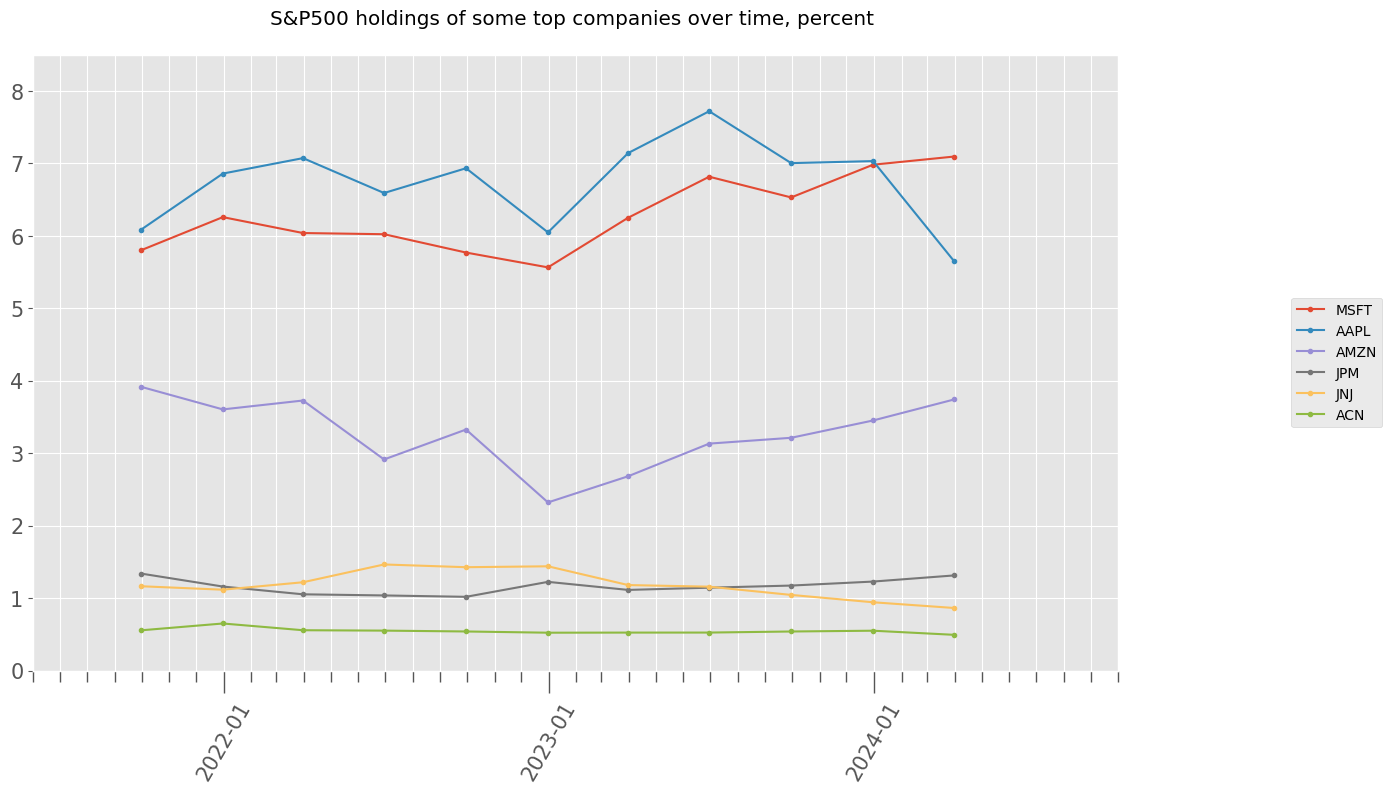

In [12]:
rcParams['figure.figsize'] = 14, 8

ax = plt.axes()

for k in lst:
    c = df_SP.loc[df_SP["ticker"].isin([k])].sort_values(by = "date")
    plt.plot(date2num(c.date),c.percent, marker='.', label = k)    # width=20

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
plt.grid(which = "minor")

plt.xticks(rotation=60)
plt.tick_params(labelsize=15)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

ax.set_ylim([0, 8.5])

ax.tick_params(axis='x', which='both', width=1)
ax.tick_params(axis='x', which='minor', length=8)
ax.tick_params(axis='x', which='major', length=16)
ax.set_xlim([datetime(2021, 6, 1), datetime(2024, 10, 1)])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.title("S&P500 holdings of some top companies over time, percent \n")
plt.show()


In [13]:
df_mag = pd.read_pickle("df_mag" + ".pkl")

In [14]:
df_mag.ticker.value_counts()

ticker
ACN     11
MSFT    11
AMZN     9
AAPL     6
Name: count, dtype: int64

In [15]:
df_mag.head()

,ticker,company,percent,date,count
12,ACN,ACCENTURE PLC CL A,2.002355,2022-12-31,60
32,MSFT,MICROSOFT CORP,7.083801,2022-12-31,60
36,AAPL,APPLE INC,4.098087,2022-12-31,60
55,AMZN,AMAZON.COM INC,1.040432,2022-12-31,60
15,ACN,ACCENTURE PLC CL A,1.534412,2021-09-30,69


In [16]:
lst

['MSFT', 'AAPL', 'AMZN', 'JPM', 'JNJ', 'ACN']

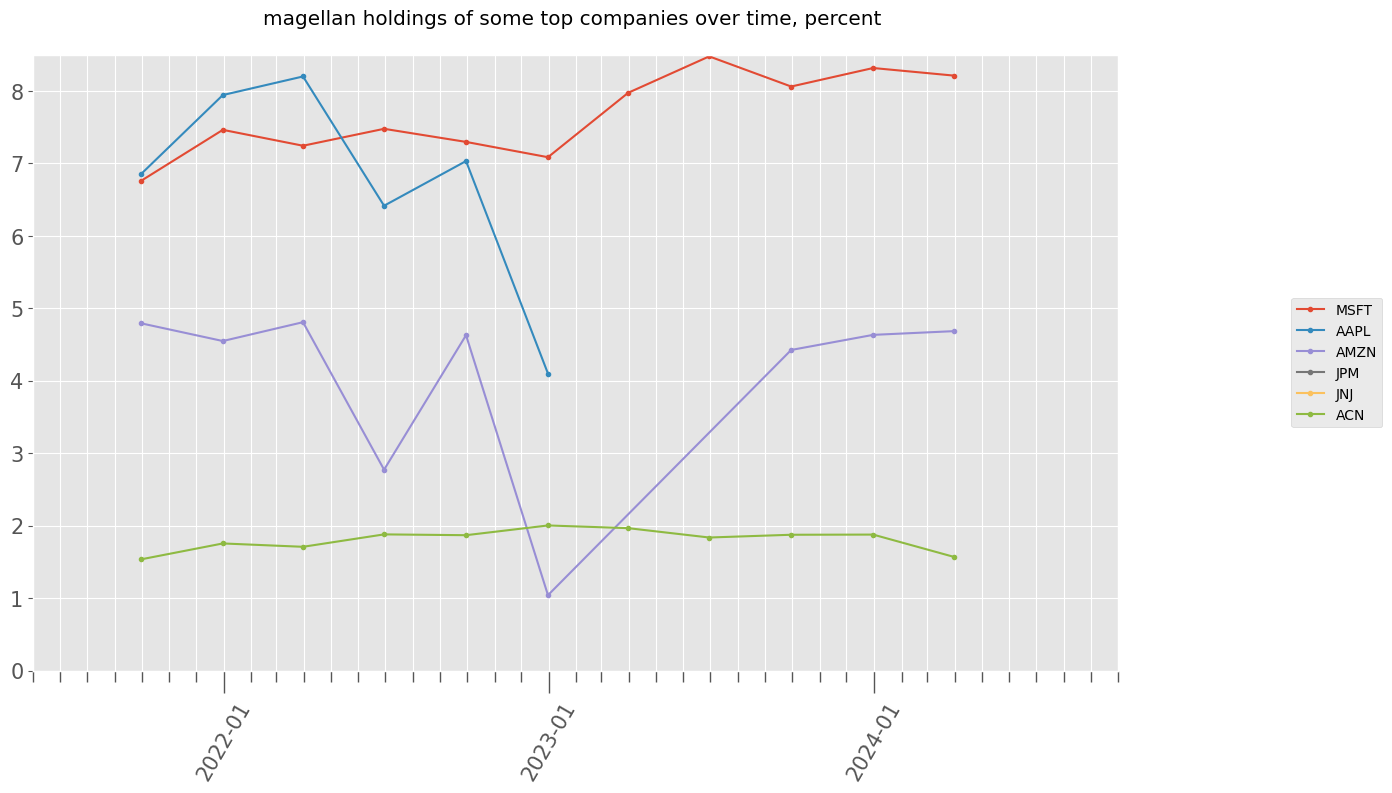

In [16]:
rcParams['figure.figsize'] = 14, 8

ax = plt.axes()

for k in lst:
    c = df_mag.loc[df_mag["ticker"].isin([k])].sort_values(by = "date")
    plt.plot(date2num(c.date),c.percent, marker='.', label = k)    # width=20


ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
plt.grid(which = "minor")

plt.xticks(rotation=60)
plt.tick_params(labelsize=15)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

ax.set_ylim([0, 8.5])

ax.tick_params(axis='x', which='both', width=1)
ax.tick_params(axis='x', which='minor', length=8)
ax.tick_params(axis='x', which='major', length=16)
ax.set_xlim([datetime(2021, 6, 1), datetime(2024, 10, 1)])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.title("magellan holdings of some top companies over time, percent \n")
plt.show()


In [17]:
df_prices = pd.read_pickle("df_prices" + ".pkl")

In [18]:
df_prices.head()

,date,close,ticker
97,2024-04-15,413.64,MSFT
98,2024-04-12,421.90,MSFT
99,2024-04-11,427.93,MSFT
100,2024-04-10,423.26,MSFT
101,2024-04-09,426.28,MSFT


In [19]:
df_prices.to_numpy()

array([[Timestamp('2024-04-15 00:00:00'), 413.64, 'MSFT'],
       [Timestamp('2024-04-12 00:00:00'), 421.9, 'MSFT'],
       [Timestamp('2024-04-11 00:00:00'), 427.93, 'MSFT'],
       ...,
       [Timestamp('2020-09-17 00:00:00'), 236.82, 'ACN'],
       [Timestamp('2020-09-16 00:00:00'), 239.42, 'ACN'],
       [Timestamp('2020-09-15 00:00:00'), 240.2, 'ACN']], dtype=object)

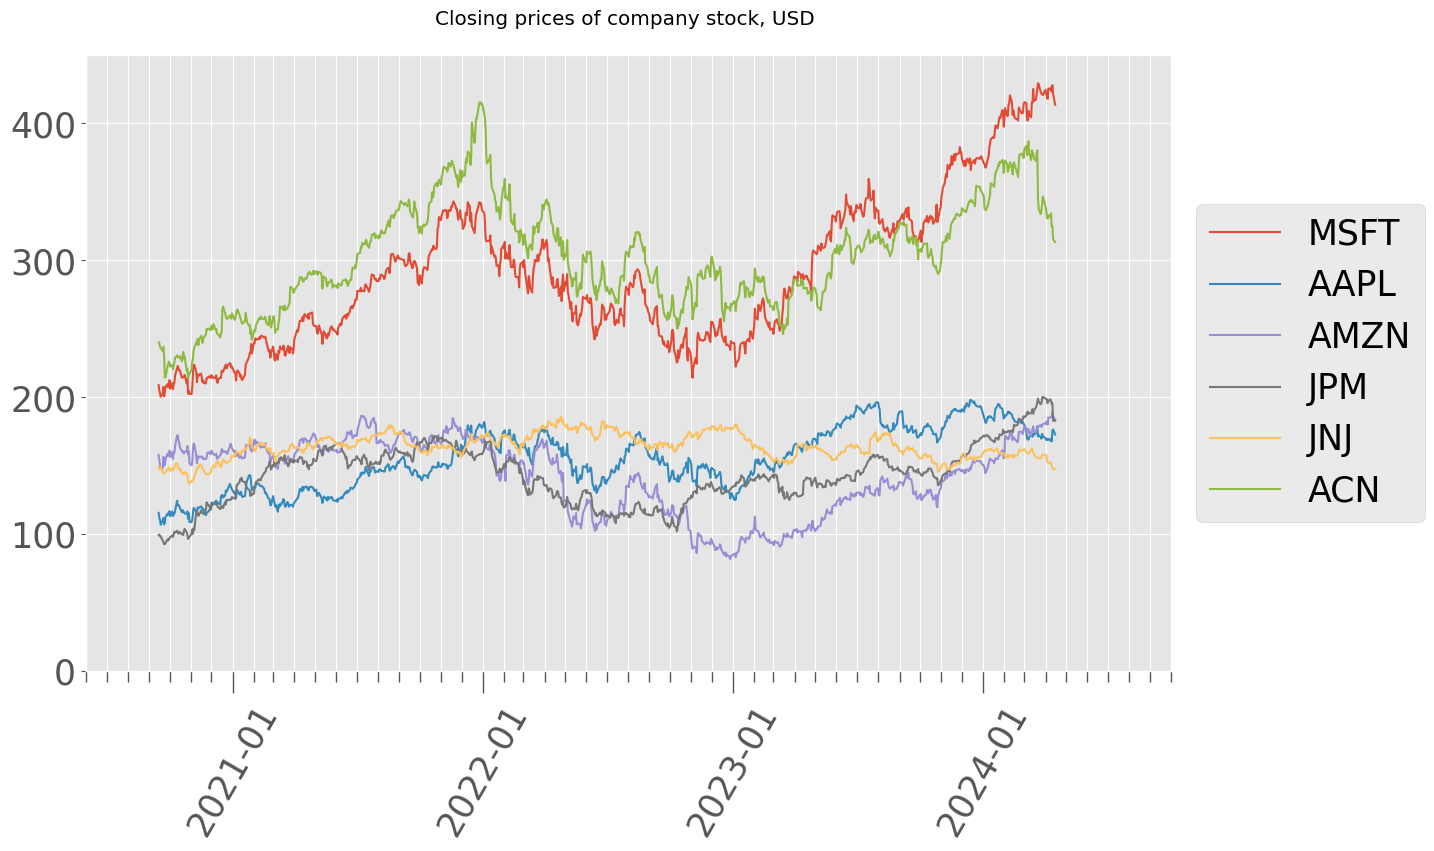

In [20]:
rcParams['figure.figsize'] = 14, 8

ax = plt.axes()

for k in lst:
    c = df_prices.loc[df_prices["ticker"].isin([k])].sort_values(by = "date")
    plt.plot(date2num(c.date),c.close, label = k)    # width=20

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
plt.grid(which = "minor")

plt.xticks(rotation=60)
plt.tick_params(labelsize=25)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

ax.set_ylim([0, 450])

ax.tick_params(axis='x', which='both', width=1)
ax.tick_params(axis='x', which='minor', length=8)
ax.tick_params(axis='x', which='major', length=16)
ax.set_xlim([datetime(2020, 6, 1), datetime(2024, 10, 1)])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), fontsize=25)

plt.title("Closing prices of company stock, USD \n")
plt.show()


## Take Home 2: Building a Virtual Fund Manager

Suppose on the 1st of January 2023 the musex fund changes strategy. “All we want to do from now onwards is mirror the S&P500 weights” is the new approach. Design and implement a strategy (of buys and sells executed at the final day of each month) that would bring the musex percentage holdings in line with the S&P500 percentage holdings within 6 months and keep them mirroring the S&P500 holdings for the rest of the time. Plot the results in a figure.


### If you have any questions or concerns please email [daniel@teamveer.com](mailto:daniel@teamveer.com) and we will get back to you!
